# Notebook 2:  Clustering con GMM y Algoritmos Jerárquicos

En este notebook vamos a implementar el algoritmo de clustering de Mezcla de Normales en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [46]:
library(mclust)
library(cluster)
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
head(datos)

,WATER,PROTEIN,FAT,LACTOSE,ASH
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10
CAMEL,87.7,3.5,3.4,4.8,0.71


---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 9 components: 

 log-likelihood  n  df       BIC       ICL
       69.49069 25 148 -337.4122 -337.4122

Clustering table:
1 2 3 4 5 6 7 8 9 
3 3 6 3 2 1 1 4 2 

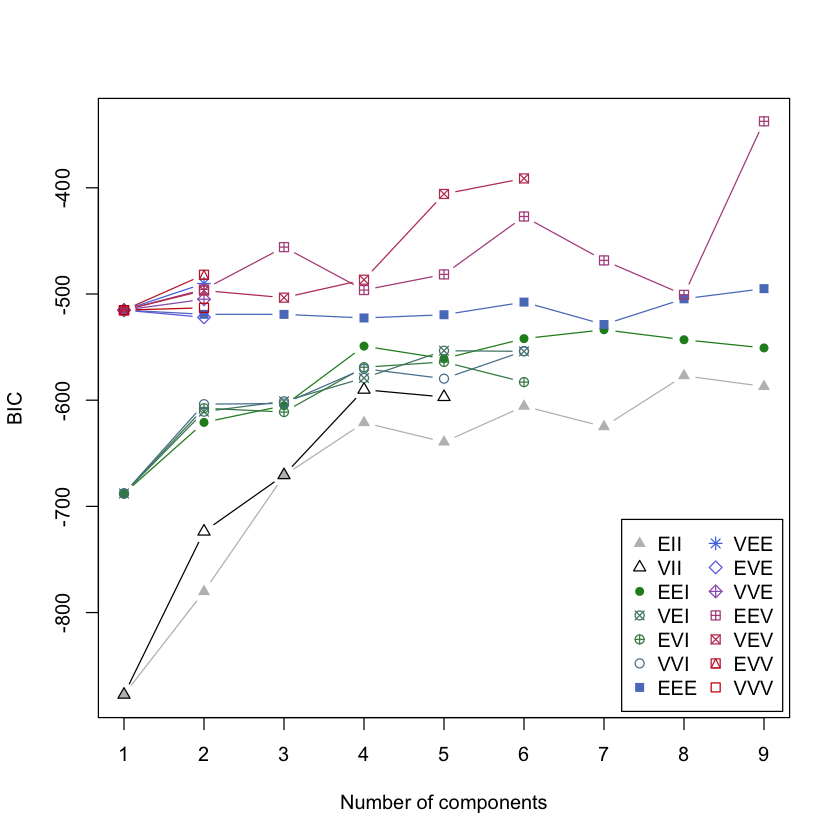

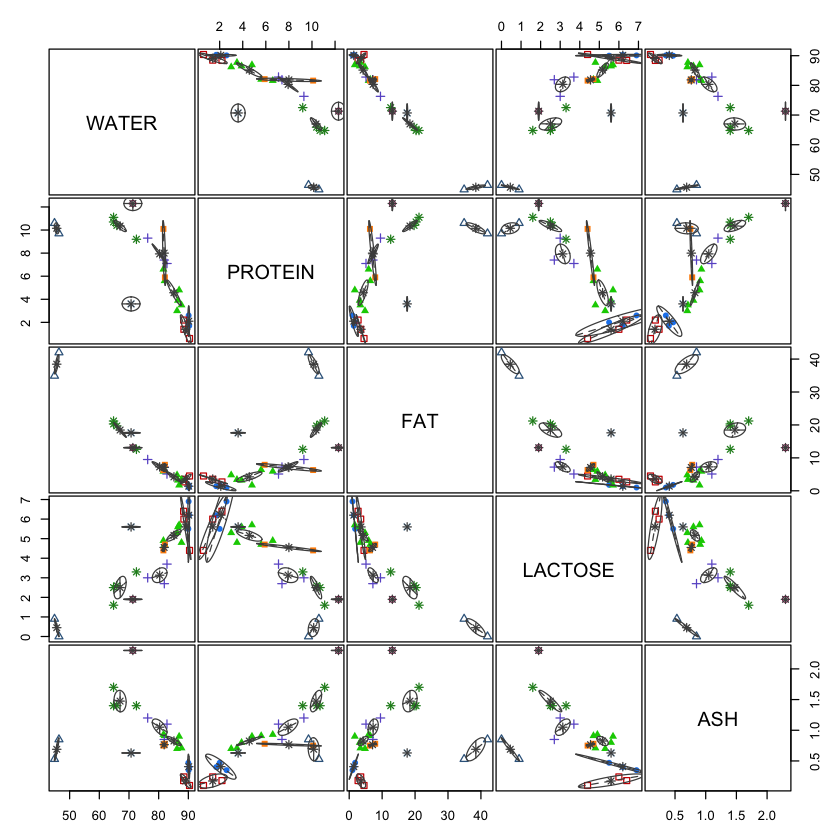

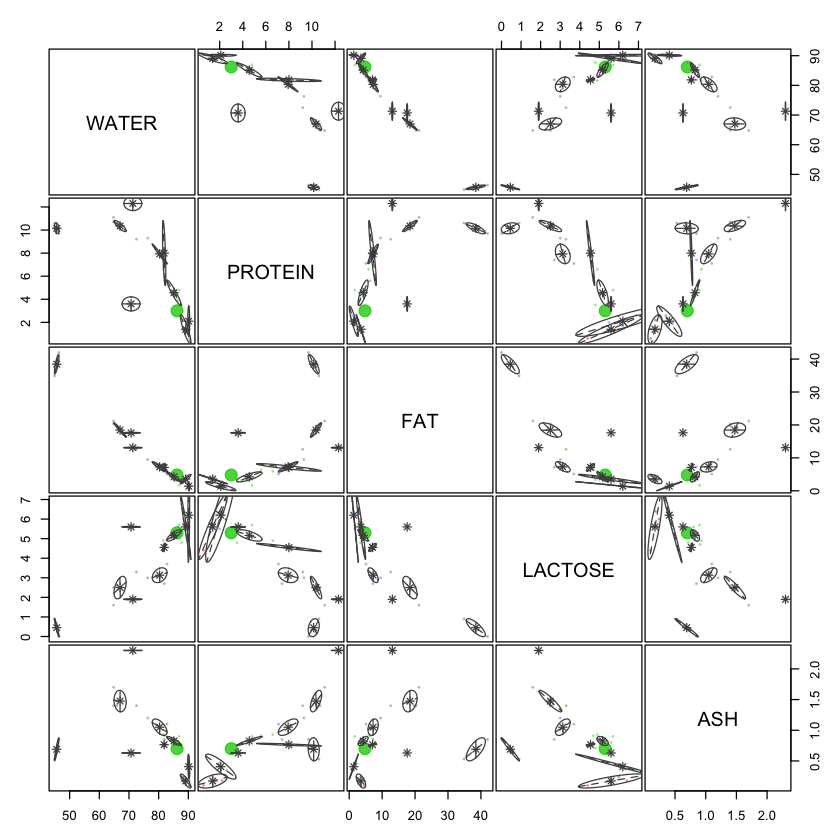

'Mclust' model object: (EEV,9) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

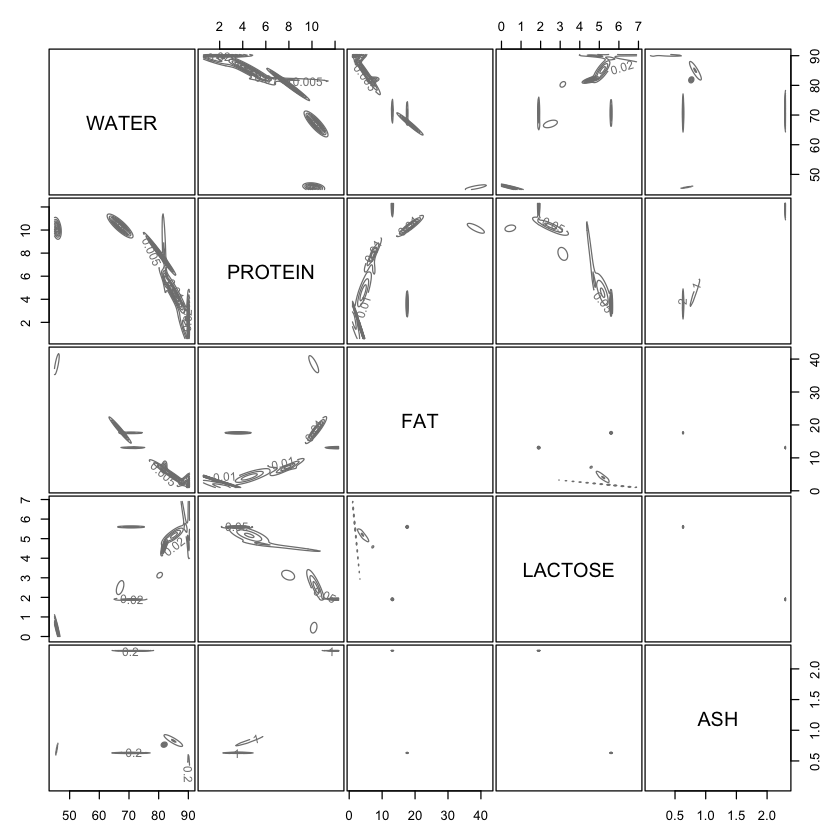

In [5]:
clus <-Mclust(datos)
summary(clus)
plot(clus)
clus

In [44]:
cl <- clus$classification
centers <- t(clus$parameters$mean)
cl


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          2          2          1          2          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         5          4          5          3          3          1          4 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          3          4          6          7          8          8 
  REINDEER      WHALE       SEAL    DOLPHIN 
         8          8          9          9

**Ejercicio 1:**

a) Explique como funciona el método Mclust, describa los principales parámetros de entrada y salida.
    
    El método Mclust agrupa los datos según la concentración de los datos a cada componente que tiene, haciendo uso del     modelo de mezcla finita gausiana, lo que permite estimar densidades de los grupos. Los parámetros de entrada son los datos  en los que queremos aplicar el método y los de salida son los datos agrupados.
    
b) Interprete y comente los resultados obtenidos. 

    Primero se obtuvo un gráfico que mostraba los grupos según el BIC (criterio de información bayesiano) y después se      muestran una serie de gráficos ordenados según componentes (calcio/proteína, grasa/proteína, etc)

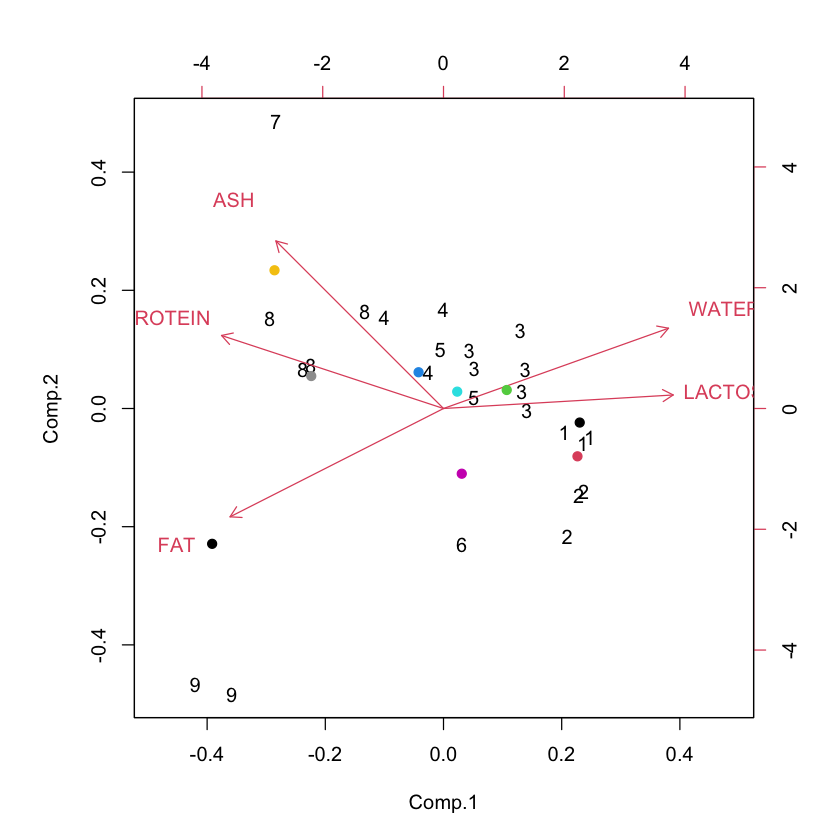

In [7]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)

biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)


**Criterio de Información Bayesiano**

Una forma de discriminar entre posibles agrupamientos, es calcular el Criterio de Información Bayesiano, cuya expresión genérica es:
$$BIC = log L(Datos\mid \hat{\theta}) - \frac{d}{2}log(N)$$
donde $d$ es el número de parámetros libres y $N$ el número de observaciones. A medida que aumenta el número de parámetros la verosimilitud aumenta, pero esto es moderado por el término en que depende de $d$.

Mclust calcula automática el BIC para distintas configuraciones de las matrices covarianza de cada Normal multivariada (que corresponden a distintos números de parámetros) así como distinto número de grupos. Por parsimonia, es recomendable escoger el primer número de grupos que representa un máximo local.

**Ejercicio 2:**

a) Utilice Mclust sin definir el número de grupos y considere el Criterio de información Bayesiano (BIC) para decidir el número de grupos óptimo. 

    Según el gráfico de BIC, el número de grupos óptimo es de 3, pues es el primer valor que muestra un máximo local
    
b) Discuta y compare  sus resultados con aquellos obtenidos con k-means

    Al comparar los gráficos obtenidos por ambos métodos podemos apreciar que el agrupamiento obtenido por kmeans
    es diferente al obtenido con Mclust. La distancia entre los datos agrupados mediante kmeans es menor que la
    obtenida en Mclust.

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 9 components: 

 log-likelihood  n  df       BIC       ICL
       69.49069 25 148 -337.4122 -337.4122

Clustering table:
1 2 3 4 5 6 7 8 9 
3 3 6 3 2 1 1 4 2 

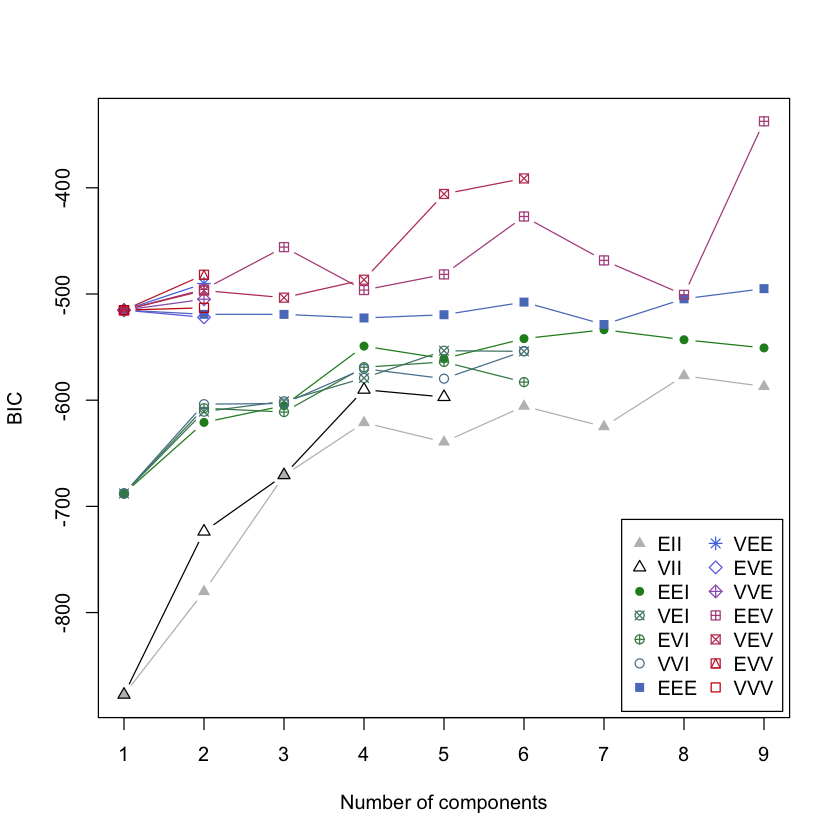

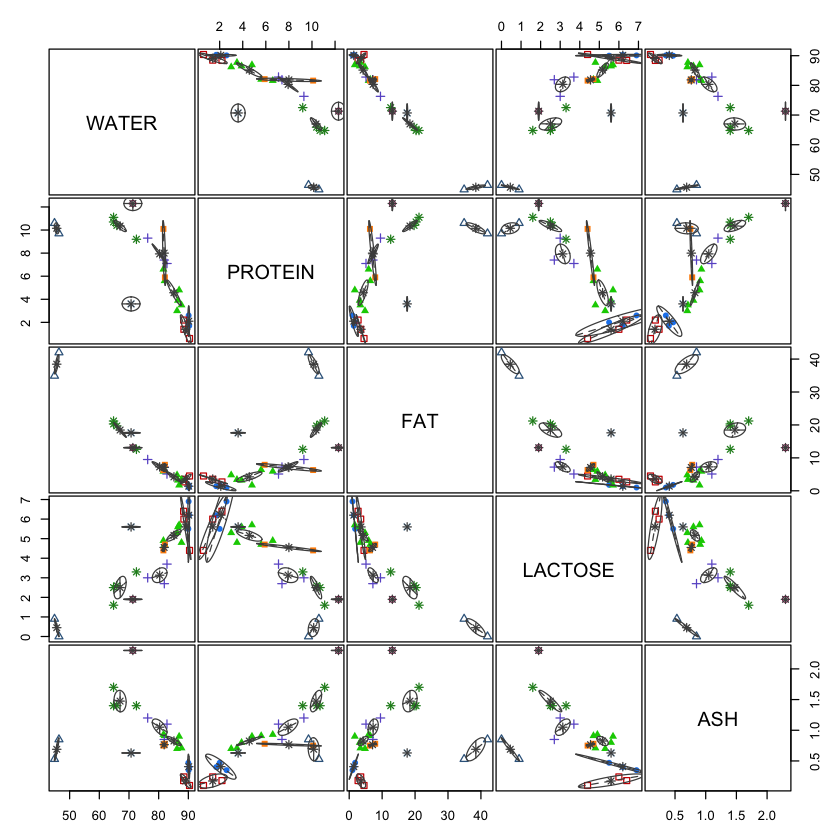

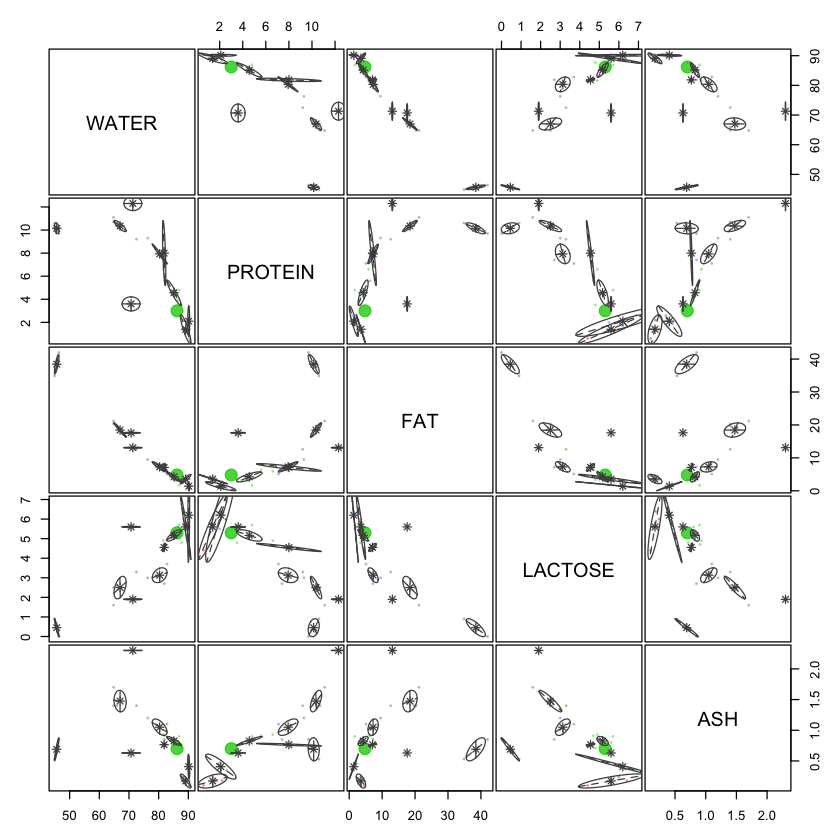

'Mclust' model object: (EEV,9) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

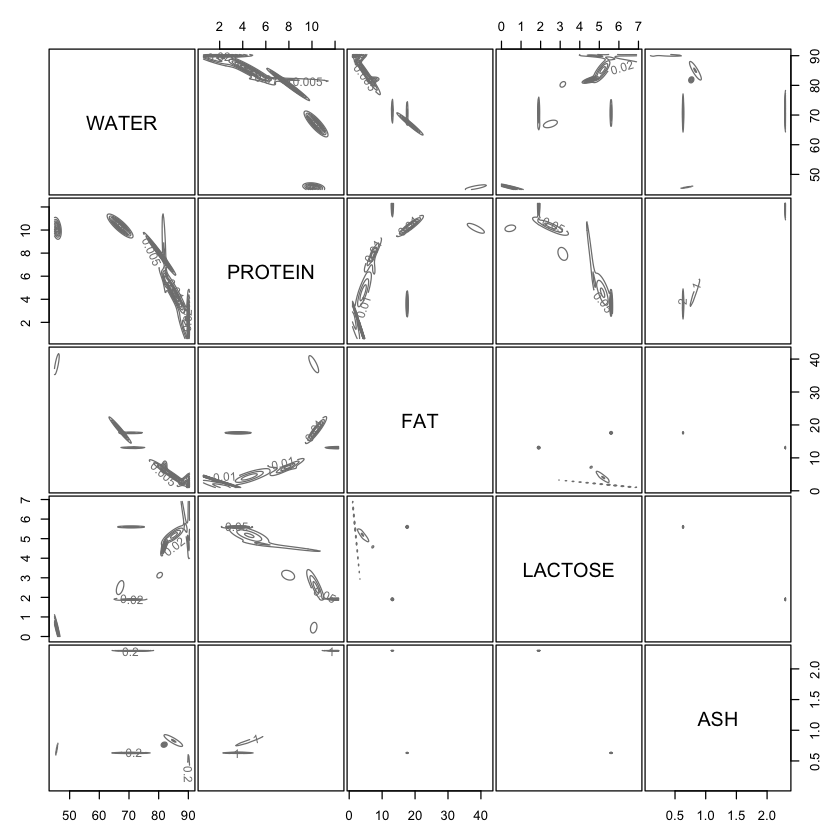

In [8]:
clus1 <-Mclust(datos)
summary(clus1)
plot(clus1)
clus1

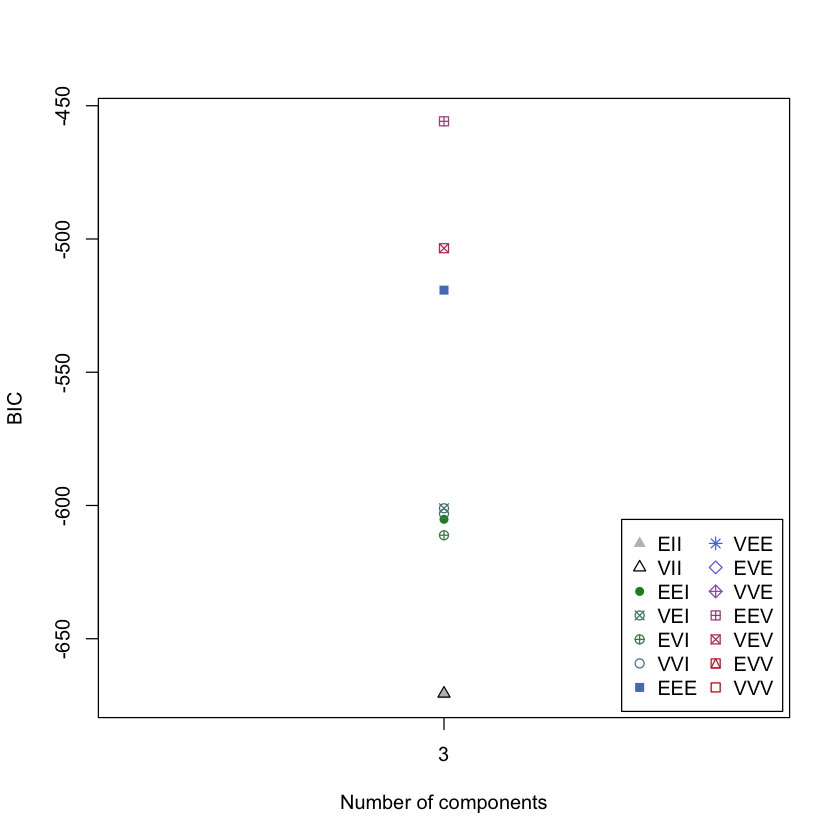

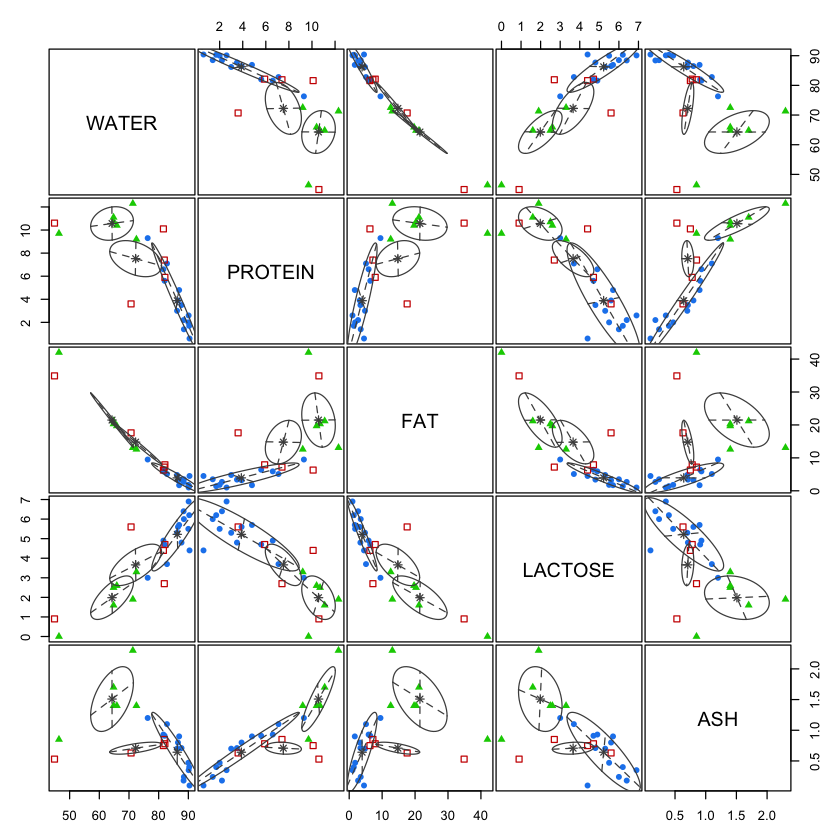

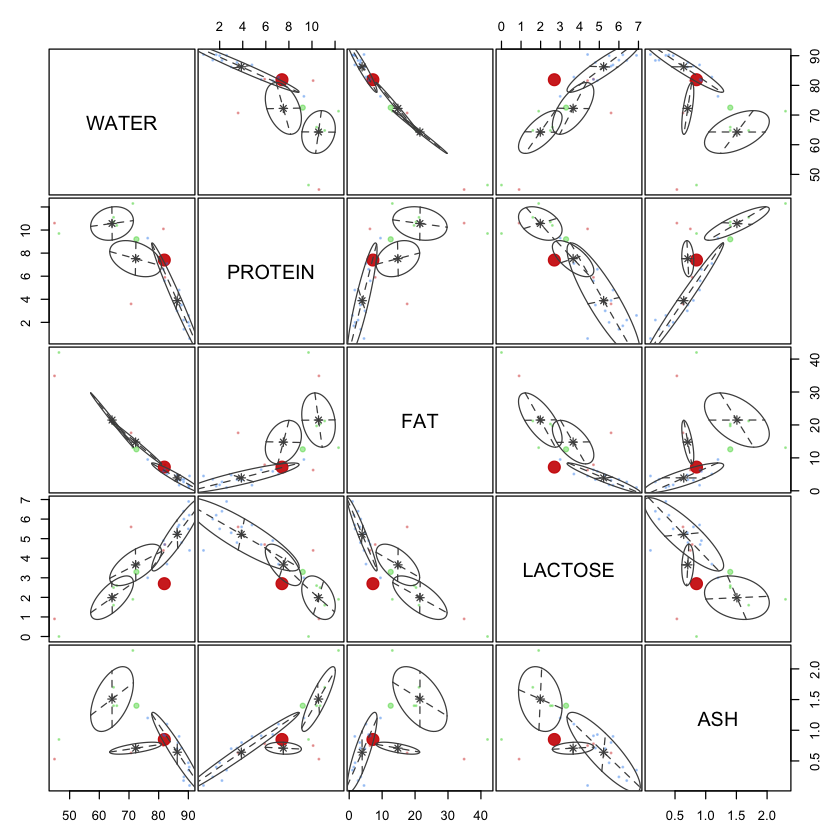

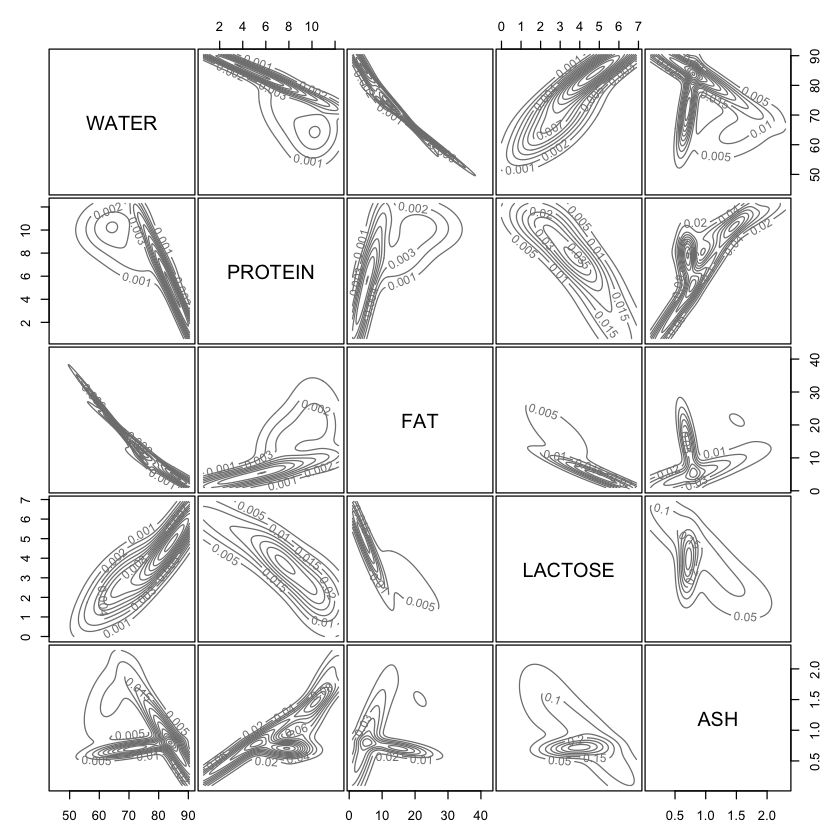

In [9]:
clus2 <- Mclust(datos, G=3)
plot(clus2)

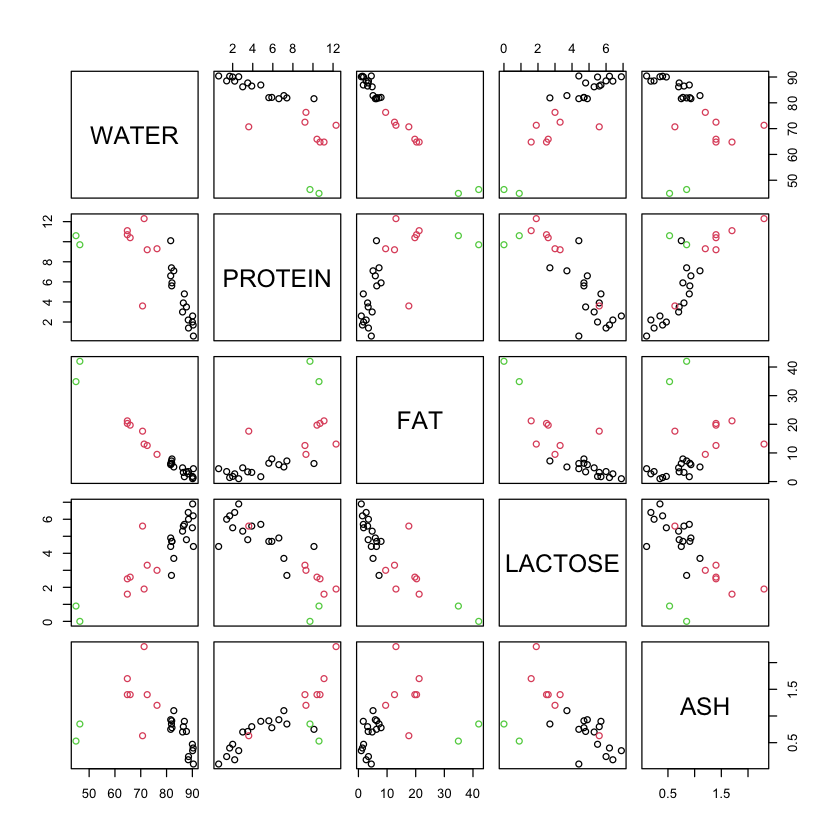

In [10]:
cl<-kmeans(datos,3,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

En lo que sigue, utilizaremos el método hclust, que permite realizar análisis de agrupamiento jerárquico

 'dist' num [1:300] 3.33 2.49 1.23 4.76 4.11 ...
 - attr(*, "Size")= int 25
 - attr(*, "Labels")= chr [1:25] "HORSE" "ORANGUTAN" "MONKEY" "DONKEY" ...
 - attr(*, "Diag")= logi FALSE
 - attr(*, "Upper")= logi FALSE
 - attr(*, "method")= chr "euclidean"
 - attr(*, "call")= language dist(x = datos)


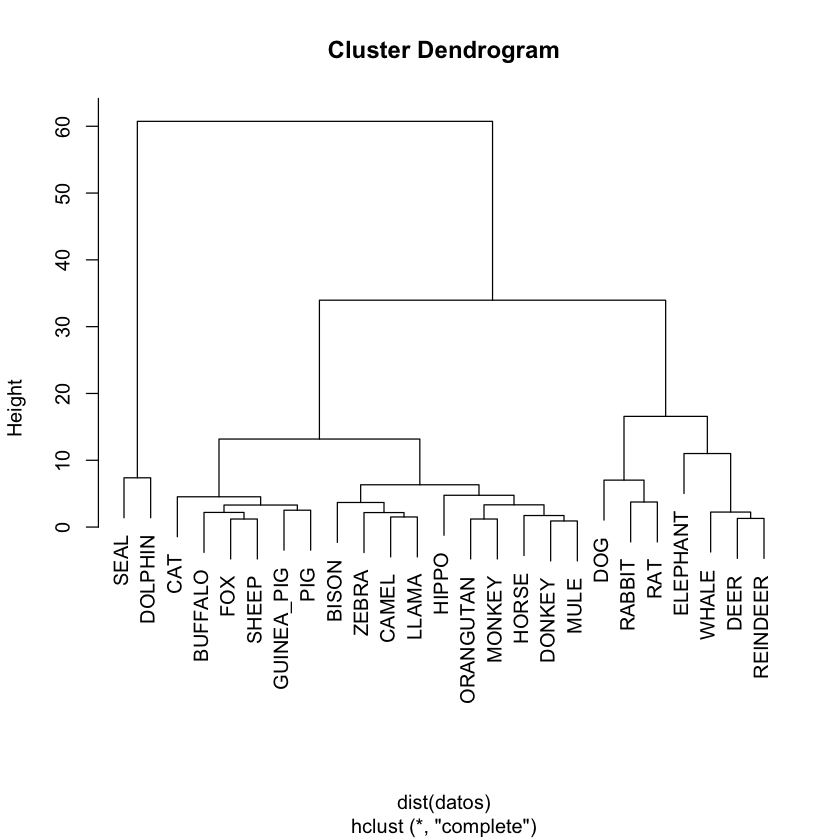

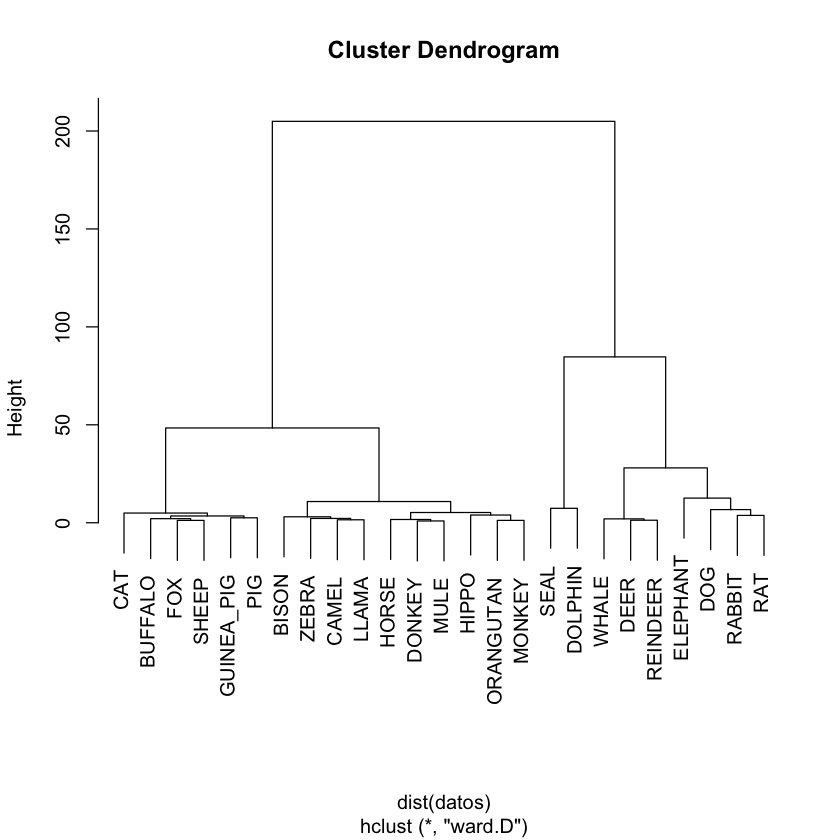

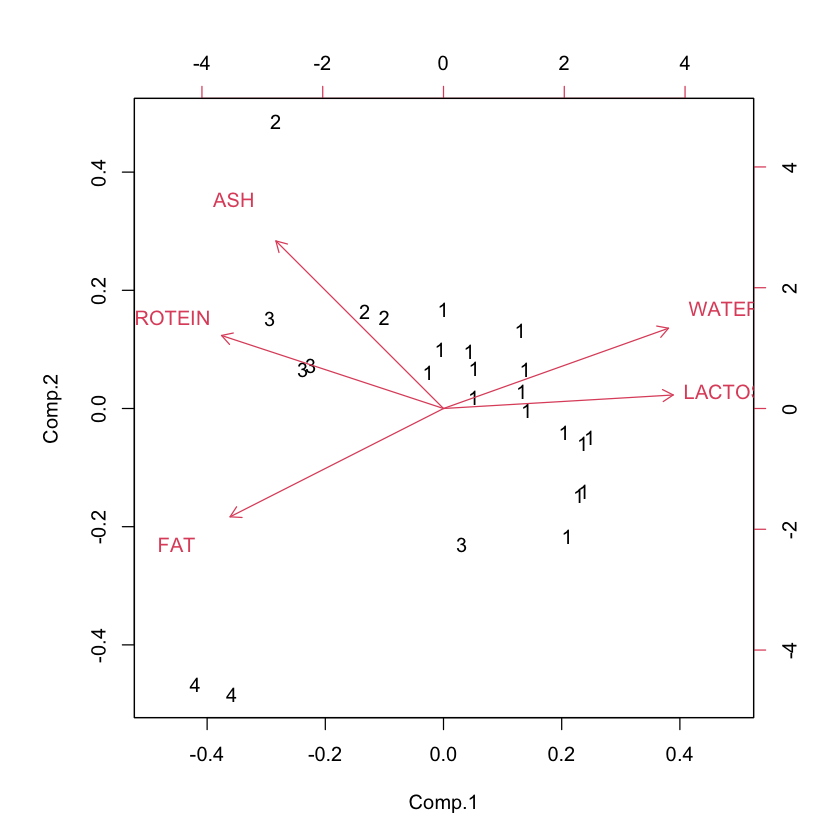

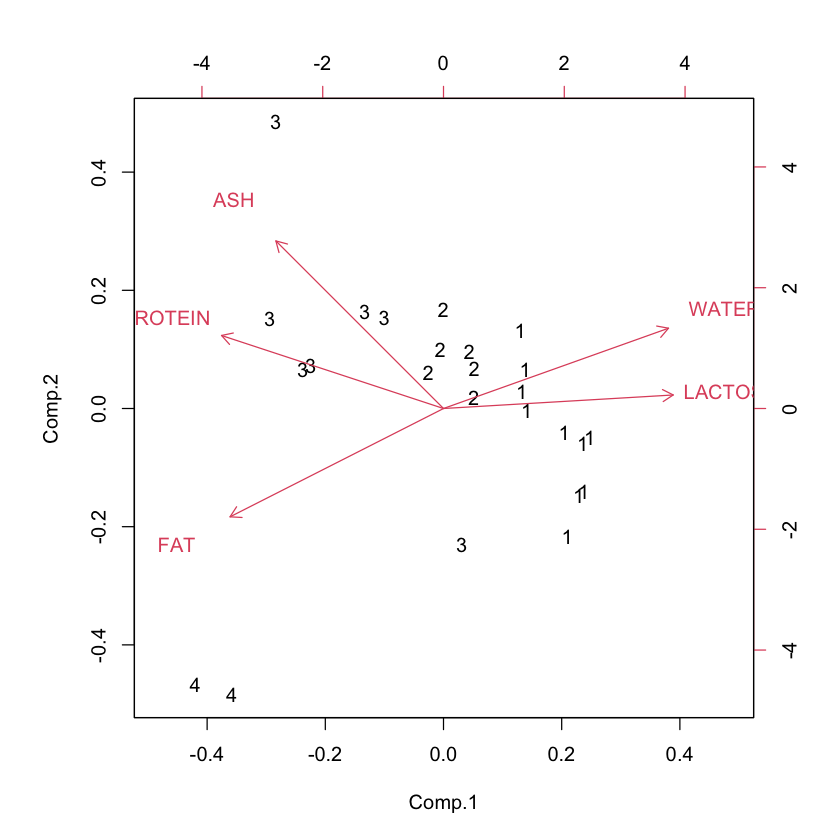

In [11]:
# str(datos)
str(dist(datos))
res3 <- hclust(dist(datos))
resWard <- hclust(dist(datos), method="ward.D")
plot(res3)
plot(resWard)
biplot(res, xlabs= cutree(res3,4))
biplot(res, xlabs= cutree(resWard,4))


**Ejercicio 3:** 

a) Explique como funciona el método hclust, describa parámetros de entrada y salida.

El método es usa el agrupamiento jerárquico. Siempre junta dos entidades con menor distancia y forma un árbol binario. Esta estrategia es el aglomerativo (bottom-up). 
Como parámetros de entrada tiene las distancias de las filas de nuestros datos. 
De salida resulta un objeto de clase hclust, cual se puede utilizar luego para análisis


b) Interprete y comente los resultados obtenidos. 

El método divide los datos a 4 diferentes grupos. El grupo 4 tiene el valor de FAT más alta, y solo hay 2 entidades. El grupo 3 tiene el PROTEIN, menos una entidad que está aislado de los otros. Grupo 2 se concentra en el componente ASH. Grupo 1 tiene los demás que consisten de WATER y LACTOSA  más altas y también es el grupo más grande.

c) Utilice otros parámetros en hclust y discuta como varían los resultados. 

Hay muchos métodos de agrupamiento. Elegimos el Ward’s variancia mínima método que trata encontrar grupos compactos y esférico. Como vemos de los graficos son mas balanceados. La distancia no es tan largo entre grupos y los grupos tienen mas o menos la misma cantidad de entidades.


**Ejercicio 4:** (3 puntos)

a) Considere los datos comunas.csv y escoja las comunas de una sola región para realizar sus análisis. Realice un análisis de clustering con K-means, GMM y Análisis Jerárquico para dichos datos, excluyendo el índice IDSE. Interprete sus resultados.

b) Estudie las medidas de calidad propuestas en Murphy, Capítulo 25: purity, rand index y mutual information (pdf en siveducMD). Calcule alguna de las medidas de calidad estudiadas, para cada uno de los análisis realizado en (a), considerando  una categorización (IDSE_bis) de los datos según el índice IDSE, de la manera siguiente:
1. IDSE_bis = 1 si 0 <= IDSE < 0.3
2. IDSE_bis = 2 si 0.3 <= IDSE < 0.4
3. IDSE_bis = 3 si 0.4 <= IDSE < 0.5
4. IDSE_bis = 4 si 0.5 <= IDSE < 0.6
5. IDSE_bis = 5 si 0.6 <= IDSE < 0.7
6. IDSE_bis = 6 si 0.7 <= IDSE < 0.8
7. IDSE_bis = 7 si 0.8 <= IDSE < 0.9
8. IDSE_bis = 8 si 0.9 <= IDSE < 1


Discuta sus resultados.

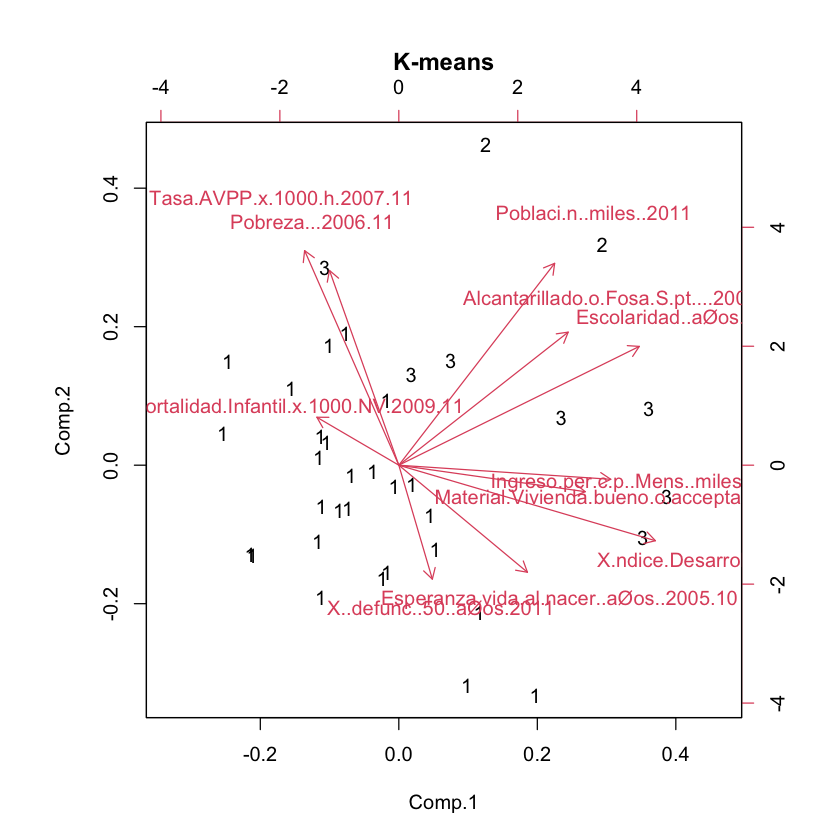

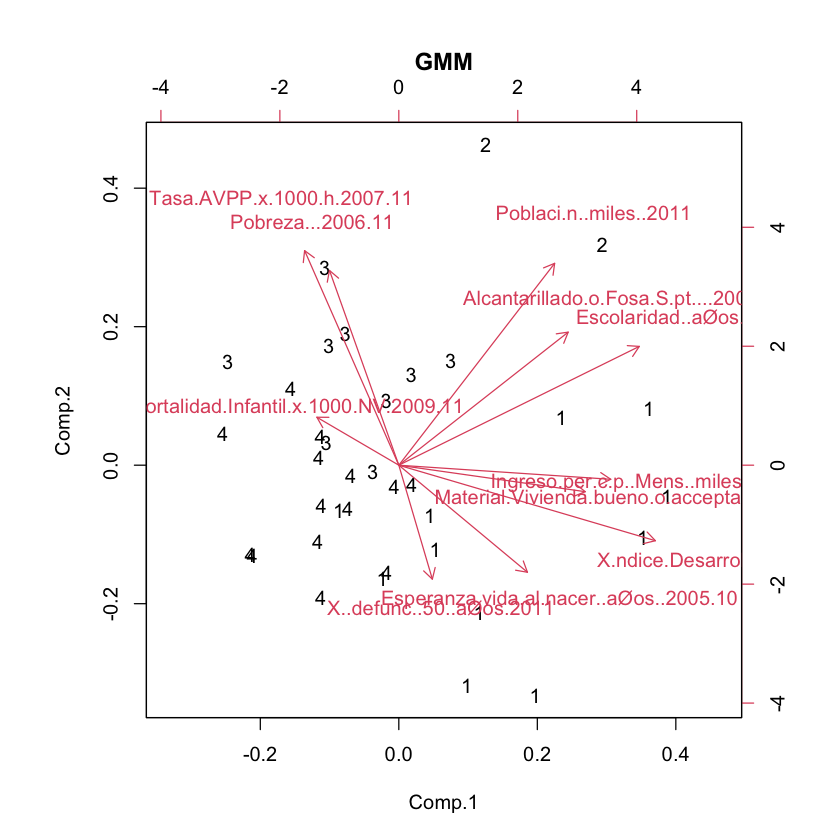

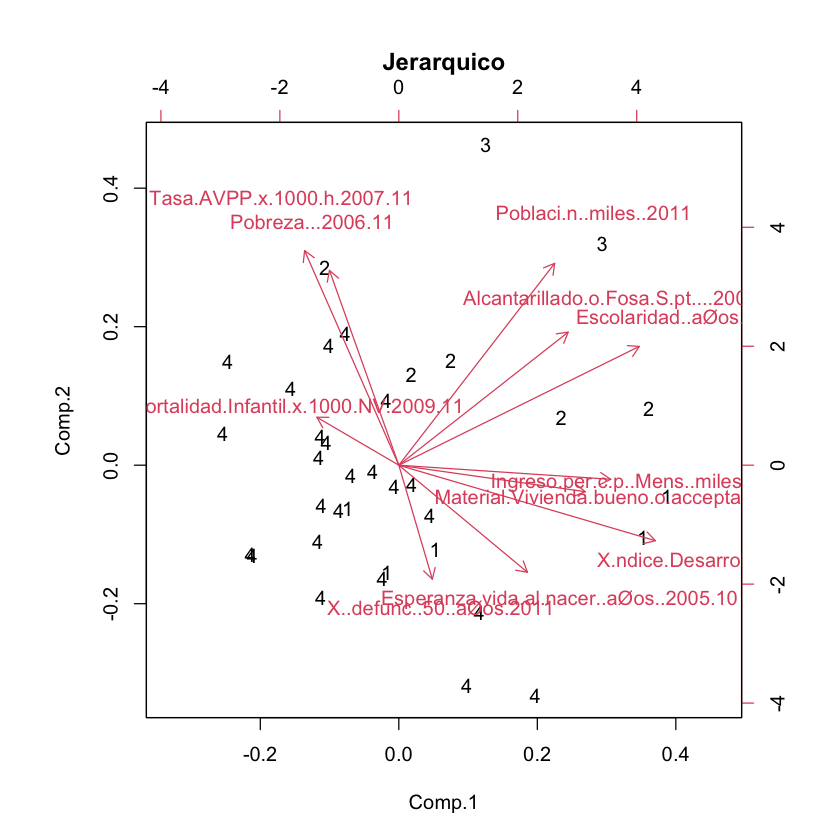

In [64]:
datosCSV <- read.csv(file="comunas.csv", sep=';', header=TRUE, fileEncoding="Latin1")
datosFinal <- subset(datosCSV, select = -c(`IDSE`))
datosRegion5 <-  datosFinal[datosCSV$Regi.n == "5",]
# -> usamos region5 porque tiene mas entidades (filas)
datosNumeros <- datosRegion5[,3:13]
resPrincomp <- princomp(datosNumeros, cor=TRUE)

#TODO: clustering K-Means
# Evaluar el mejor valor del k
# J<-rep(0,20)
# fin_iter<-20

# for (k in 1:fin_iter){
#     cl<-kmeans(datosNumeros,k,iter.max=1000,nstart=10)
# 	  J[k]<-cl$tot.withinss
# }

# plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) # Nos da resultado que k = 3 es el mejor valor

kMeans<- kmeans(datosNumeros, 3, iter.max=10000, nstart=10)
biplot(resPrincomp, xlabs=kMeans$cluster, main="K-means")

#GMM:
clustM <- Mclust(datosNumeros, G=4)
biplot(resPrincomp, xlabs=clustM$classification, main="GMM")

#Jerarquico:
hclus <- hclust(dist(datosNumeros))
biplot(resPrincomp, xlabs=cutree(hclus, 4), main="Jerarquico")